# Importing Libraries

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as statistics

# Conncting to the API

In [115]:
client_credentials_manager = SpotifyClientCredentials(client_id='clientID', client_secret='clientsecret ID')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [8]:
#Function to get track ID in the playlist
def getTrackIDs(playlist_id):
    ids = []
    playlist = sp.playlist(playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('37i9dQZF1DWUXSVcZljKtz')

In [18]:
print(len(ids))

50


In [59]:
#Function to get track metadata and features
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)

    # meta
    name = meta['name']
    length = meta['duration_ms']
    popularity = meta['popularity']

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    valence= features[0]['valence']
    time_signature = features[0]['time_signature']
 

    track = [name,length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, time_signature]
    return track

In [60]:
# loop over track ids 
tracks = []
for i in range(len(ids)):
    time.sleep(.5)
    track = getTrackFeatures(ids[i])
    tracks.append(track)

# create dataset
df = pd.DataFrame(tracks, columns = ['length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature'])
#df
df.to_csv("spotify.csv", sep = ',')

KeyboardInterrupt: 

# Exploring the Data

In [11]:
df=pd.read_csv(r'C:\Users\kibe\Desktop\Projects\Spotify Analysis\spotify.csv')

In [92]:
df.sample(5)

,Unnamed: 0,name,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
41,41,Ukimwona,232120,12,0.761,0.0289,0.824,0.000000,0.220,-4.113,0.0625,94.972,0.602,4
5,5,I Want,191797,27,0.901,0.5600,0.476,0.000015,0.104,-7.618,0.3110,89.028,0.616,4
21,21,Baridi,198979,31,0.491,0.2960,0.605,0.000000,0.105,-8.257,0.1510,176.024,0.542,4
49,49,Extra Pressure,293276,33,0.759,0.0188,0.726,0.000000,0.182,-3.633,0.3020,148.910,0.139,4
29,29,Regina,197138,35,0.501,0.1180,0.837,0.000000,0.156,-4.354,0.1250,111.980,0.727,5


In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

Unnamed: 0          0
name                0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
time_signature      0
dtype: int64

In [23]:
df.dtypes

numerical_top_50      int64
length                int64
popularity            int64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
time_signature        int64
dtype: object

In [ ]:
df.drop("name", axis=1, inplace=True)
df = df.rename(columns = {'Unnamed: 0' : 'numerical_top_50'})


# Visualization

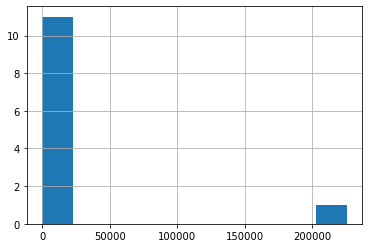

In [18]:
#to find out the average track features of the top 50 songs 
df.mean().hist()
plt.show()

<b>We will have to scale down the values<b/> 

<b>I want to compare the mean of the values above with a newly releaased track. I chose I chose 'Dala Wa' by Mejja released on 21st October 2022 (6days ago).<b/> 

In [12]:
#to get features of the Mejja song using the trackID
track_features=[]
track=getTrackFeatures('3vwCLR1fyjeMCkPFfnfnHL')
track_features.append(track)
#track_features
single_track_df = pd.DataFrame(track_features, columns = ['length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature'])

#single_track_df.drop("name", axis=1, inplace=True)
single_track_df

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,216470,17,0.686,0.273,0.689,0,0.0588,-5.251,0.188,102.056,0.419,4


In [24]:
#joining the two dataframes and then scaling them down
new_df = df.append([single_track_df])
new_df.head()


C:\Users\kibe\AppData\Local\Temp\ipykernel_15656\499429540.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = df.append([single_track_df])


,numerical_top_50,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,0.0,220755,39,0.740,0.102,0.641,0.000000,0.1210,-9.494,0.0863,79.022,0.324,4
1,1.0,204000,46,0.640,0.328,0.464,0.000000,0.2250,-7.564,0.0876,90.029,0.294,4
2,2.0,220310,37,0.779,0.300,0.488,0.000000,0.0757,-10.387,0.0366,135.974,0.712,4
3,3.0,196500,35,0.917,0.101,0.681,0.000033,0.0919,-7.564,0.0786,109.986,0.719,4
4,4.0,198582,35,0.535,0.707,0.559,0.000000,0.1240,-5.690,0.0856,159.957,0.762,4


In [25]:
#scaling down the whole dataframe
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()
#scaling the whole dataframe
scaler=MinMaxScaler()
scaler.fit(new_df)
scaled=scaler.fit_transform(new_df)
scaled_df=pd.DataFrame(scaled, columns=new_df.columns)
scaled_df.head()

,numerical_top_50,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,0.000000,0.133608,0.837209,0.651543,0.142501,0.560380,0.000000,0.136573,0.493666,0.126656,0.021522,0.223430,0.5
1,0.020408,0.086539,1.000000,0.470054,0.462823,0.320217,0.000000,0.291128,0.643662,0.129969,0.115157,0.187198,0.5
2,0.040816,0.132358,0.790698,0.722323,0.423137,0.352782,0.000000,0.069252,0.424264,0.000000,0.506002,0.692029,0.5
3,0.061224,0.065470,0.744186,0.972777,0.141083,0.614654,0.000226,0.093327,0.643662,0.107034,0.284927,0.700483,0.5
4,0.081633,0.071318,0.744186,0.279492,1.000000,0.449118,0.000000,0.141031,0.789306,0.124873,0.710020,0.752415,0.5


In [26]:
#separatingthe row with the mejja track features
scaled_single_track_df=scaled_df.iloc[50]
scaled_single_track_df

numerical_top_50         NaN
length              0.121570
popularity          0.325581
danceability        0.553539
acousticness        0.384868
energy              0.625509
instrumentalness    0.000000
liveness            0.044137
loudness            0.823424
speechiness         0.385831
tempo               0.217468
valence             0.338164
time_signature      0.500000
Name: 50, dtype: float64

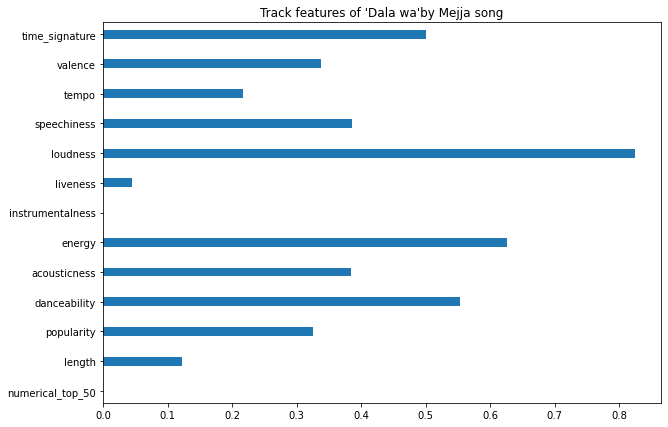

In [27]:
#viewing the track features on a graph
scaled_single_track_df.plot(kind='barh',figsize = (10,7), width = 0.3)
plt.title("Track features of 'Dala wa'by Mejja song")
plt.show()

In [28]:
#dropping the mejja song track features row
scaled_df=scaled_df.drop(scaled_df. index[50]) 

In [29]:
scaled_df.to_csv("scaled_spotify.csv", sep = ',')

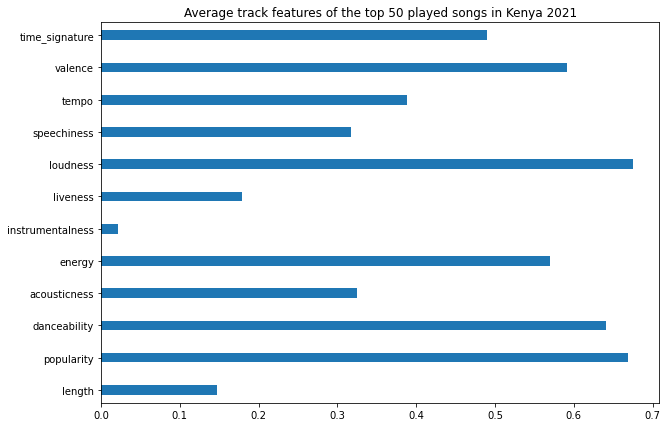

In [15]:
#displaying the average track features of the top 50 songs
scaled_df.mean().plot(kind='barh',figsize = (10,7), width = 0.3)
plt.title("Average track features of the top 50 played songs in Kenya 2021")
plt.show()

<b>Now to compare the two plots<b/>

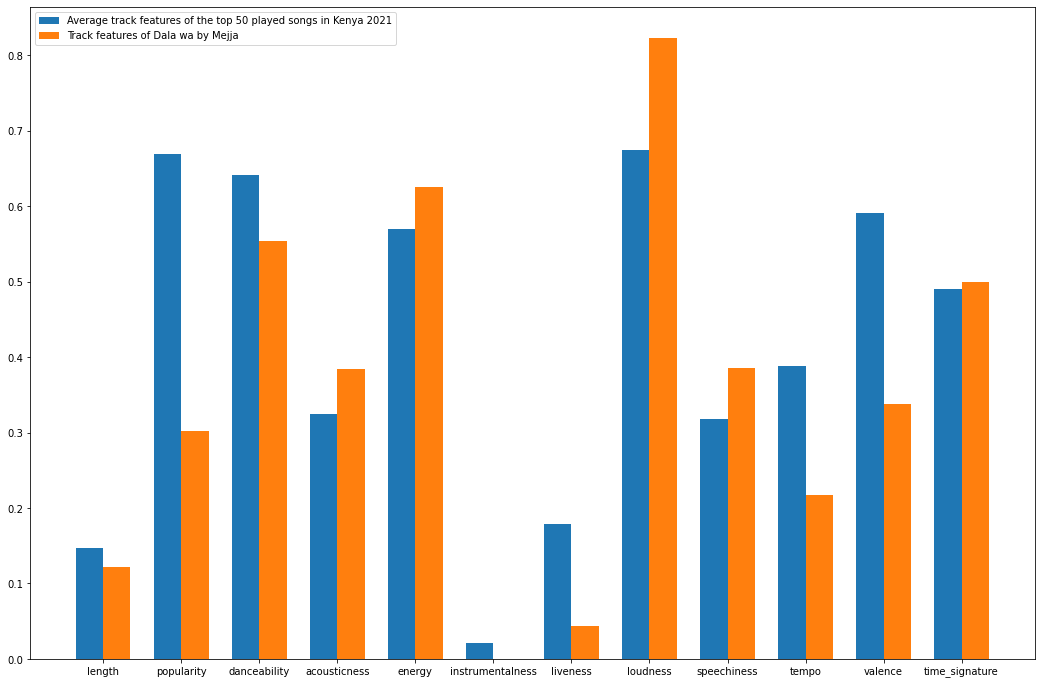

In [26]:

labels = ['length','popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature']
average = scaled_df.mean()
single = scaled_single_track_df

x = np.arange(len(labels))  # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots(figsize=(18,12))
rects1 = ax.bar(x - width/2, average, width, label='Average track features of the top 50 played songs in Kenya 2021')
rects2 = ax.bar(x + width/2, single, width, label='Track features of Dala wa by Mejja ')

# Add some text for labels, title and custom x-axis tick labels, etc.


ax.set_xticks( x,labels)
ax.legend()






To find the correlation to popularity

In [94]:
df['categorical_top_50'] = df['numerical_top_50']

df['categorical_top_50'] = df.categorical_top_50.astype('category')

In [95]:
correlation_matrix = df.corr() # Gets correlation between all features. 

correlation_matrix['numerical_top_50'].sort_values(ascending = False)

numerical_top_50    1.000000
liveness            0.232472
length              0.204162
loudness            0.086757
energy              0.082209
instrumentalness    0.061621
time_signature      0.059608
tempo               0.040365
valence             0.000989
speechiness        -0.028327
acousticness       -0.045130
danceability       -0.148345
popularity         -0.375437
Name: numerical_top_50, dtype: float64

Liveness, popularity, acousticness and length seem to be the highest drivers for numerical_top_50

<b>Plotting liveness over categorical_top_50<b>

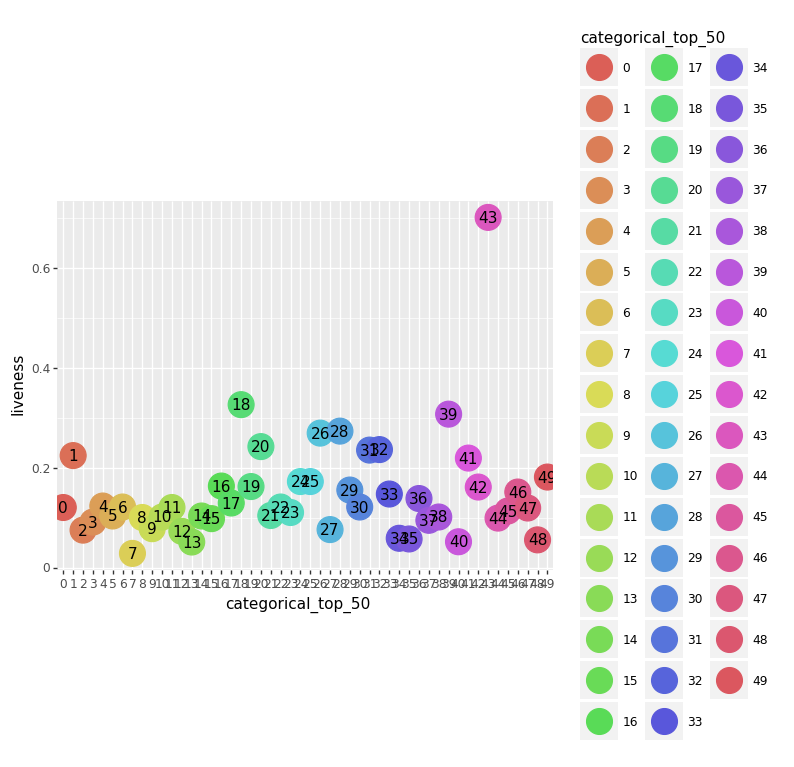

<ggplot: (160170235245)>

In [96]:
from plotnine import ggplot, aes, geom_line, geom_boxplot, geom_point, geom_text

columns = ['length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
	
test_df = df.groupby('categorical_top_50', as_index = False).agg({'liveness' : 'mean'})
(
			ggplot(test_df) 
			+ aes(x = 'categorical_top_50', y = 'liveness', color = 'categorical_top_50') 
			+ geom_point( size = 10) 
			+ geom_text(aes(label = 'categorical_top_50'), color = 'black')
)

<b> Plotting popularity over categorical_top_50<b>

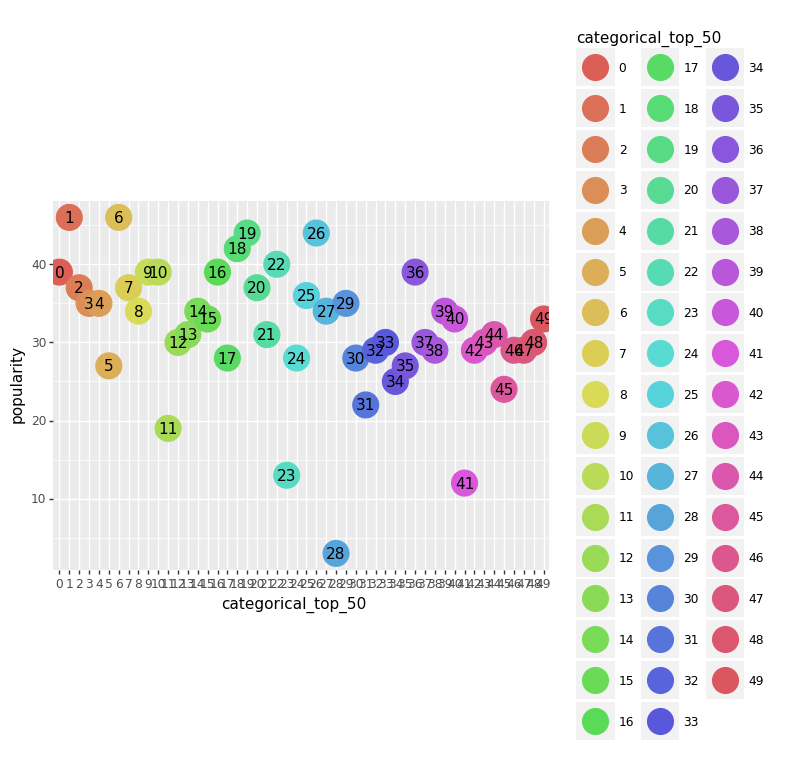

<ggplot: (160170509156)>

In [98]:
from plotnine import ggplot, aes, geom_line, geom_boxplot, geom_point, geom_text


	
test_df = df.groupby('categorical_top_50', as_index = False).agg({'popularity' : 'mean'})

(
		ggplot(test_df) 
		+ aes(x = 'categorical_top_50', y = 'popularity', color = 'categorical_top_50') 
		+ geom_point( size = 10) 
		+ geom_text(aes(label = 'categorical_top_50'), color = 'black')
)

<b> plotting acousticness over categorical_top_50<b>

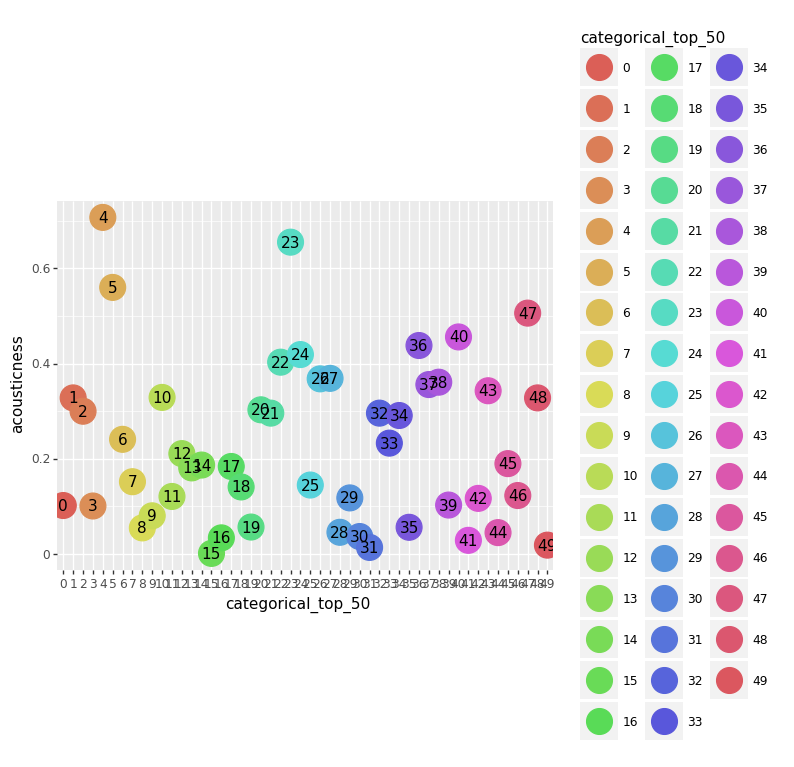

<ggplot: (160170837977)>

In [100]:
	
test_df = df.groupby('categorical_top_50', as_index = False).agg({'acousticness' : 'mean'})

(
		ggplot(test_df) 
		+ aes(x = 'categorical_top_50', y = 'acousticness', color = 'categorical_top_50') 
		+ geom_point( size = 10) 
		+ geom_text(aes(label = 'categorical_top_50'), color = 'black')
)

<b>Plotting length over categorical_top_50<b>

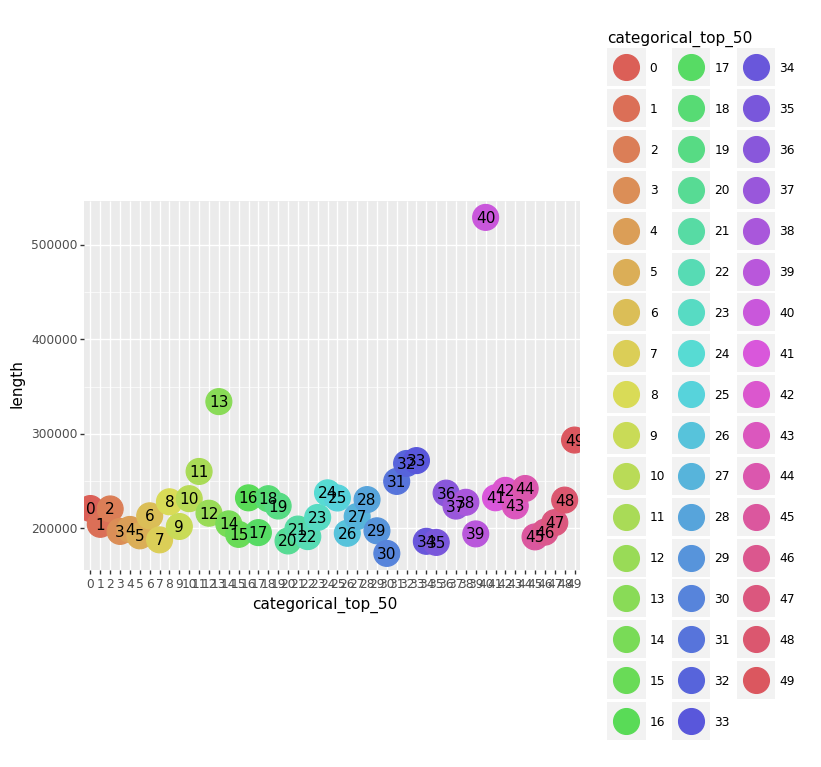

<ggplot: (160171165456)>

In [102]:
	
test_df = df.groupby('categorical_top_50', as_index = False).agg({'length' : 'mean'})

(
		ggplot(test_df) 
		+ aes(x = 'categorical_top_50', y = 'length', color = 'categorical_top_50') 
		+ geom_point( size = 10) 
		+ geom_text(aes(label = 'categorical_top_50'), color = 'black')
)

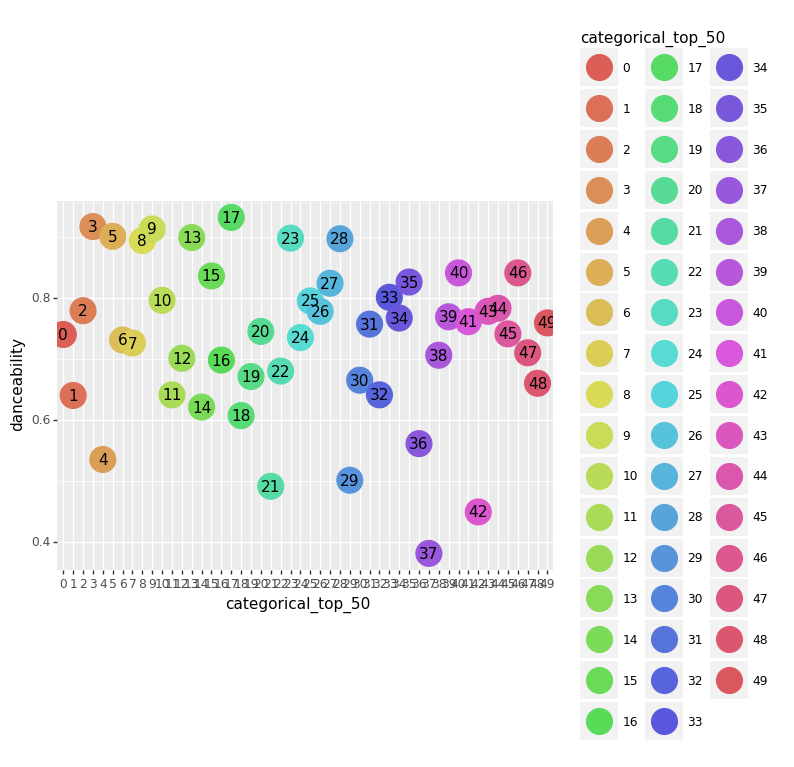

<ggplot: (160172121528)>

In [104]:
	
test_df = df.groupby('categorical_top_50', as_index = False).agg({'danceability' : 'mean'})

(
		ggplot(test_df) 
		+ aes(x = 'categorical_top_50', y = 'danceability', color = 'categorical_top_50') 
		+ geom_point( size = 10) 
		+ geom_text(aes(label = 'categorical_top_50'), color = 'black')
)

Features like liveness, popularity, acousticness, length and danceability seem to have values around the same area so there's a pattern.

<b>To get more Kenyan tracks and their audio features<b>

In [36]:
id_ = getTrackIDs('37i9dQZF1DX7z7RLIui5KP')
print(len(ids))

60


# Retrieving track data from multiple kenyan playlists

In [61]:
tracks = []
for i in range(len(id_)):
    time.sleep(.5)
    track = getTrackFeatures(id_[i])
    tracks.append(track)

# create dataset
df_01 = pd.DataFrame(tracks, columns = ['name','length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature'])
df_01.head()

,name,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,Unrelatable,160671,30,0.736,0.2370,0.291,0.000059,0.2670,-8.871,0.0488,135.963,0.221,4
1,Oversized T-shirt,198546,46,0.785,0.0479,0.720,0.000105,0.1600,-4.799,0.0542,99.970,0.402,4
2,Inauma,210309,48,0.730,0.1300,0.673,0.000000,0.1250,-8.518,0.0597,96.980,0.632,4
3,Imagination (feat. Nyashinski & Karun),197333,32,0.741,0.5780,0.705,0.003090,0.0945,-8.564,0.0827,89.975,0.592,4
4,Vacation,215066,51,0.740,0.5330,0.487,0.000004,0.1100,-8.426,0.0873,90.011,0.397,4


In [63]:
id_02 = getTrackIDs('1CVRiOS5O6LEdtF5iAskG1')
tracks = []
for i in range(len(id_02)):
    time.sleep(.5)
    track = getTrackFeatures(id_02[i])
    tracks.append(track)

# create dataset
df_02 = pd.DataFrame(tracks, columns = ['name','length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature'])
df_02.head()

,name,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,Imagination (feat. Nyashinski & Karun),197333,32,0.741,0.578,0.705,0.003090,0.0945,-8.564,0.0827,89.975,0.592,4
1,Dimension,151304,46,0.743,0.284,0.690,0.000005,0.1080,-7.352,0.0845,91.983,0.641,4
2,Unrelatable,160671,30,0.736,0.237,0.291,0.000059,0.2670,-8.871,0.0488,135.963,0.221,4
3,Onlyfans,179629,29,0.852,0.307,0.498,0.000000,0.0911,-12.100,0.0578,134.002,0.654,4
4,Inauma,210309,48,0.730,0.130,0.673,0.000000,0.1250,-8.518,0.0597,96.980,0.632,4


In [64]:
id_03 = getTrackIDs('3nGYzcfZkaY7OjcAs0R5qR')
tracks = []
for i in range(len(id_03)):
    time.sleep(.5)
    track = getTrackFeatures(id_03[i])
    tracks.append(track)

# create dataset
df_03 = pd.DataFrame(tracks, columns = ['name','length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature'])
df_03.head()

,name,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,Ama Aje,189098,30,0.394,0.1360,0.485,0.000721,0.3220,-15.003,0.1100,193.818,0.951,4
1,Woman,171000,16,0.505,0.3880,0.462,0.000009,0.1250,-11.797,0.2010,159.689,0.815,4
2,Inauma,210309,48,0.730,0.1300,0.673,0.000000,0.1250,-8.518,0.0597,96.980,0.632,4
3,Playlist,182048,13,0.756,0.2040,0.645,0.001790,0.0879,-7.539,0.0883,96.985,0.638,4
4,Time,138681,16,0.905,0.0801,0.779,0.000164,0.0522,-8.562,0.2330,100.046,0.806,4


In [65]:
id_04 = getTrackIDs('3Ty9WRvdIv8A3fKx0MS8qi')
tracks = []
for i in range(len(id_04)):
    time.sleep(.5)
    track = getTrackFeatures(id_04[i])
    tracks.append(track)

# create dataset
df_04 = pd.DataFrame(tracks, columns = ['name','length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature'])
df_04.head()

,name,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,Wah Wah,318933,16,0.684,0.220,0.703,0.000000,0.7640,-5.437,0.280,140.062,0.668,4
1,Geri Inengi,270000,42,0.628,0.287,0.753,0.000012,0.0994,-5.286,0.375,96.407,0.615,4
2,Umoroto,267441,35,0.770,0.377,0.797,0.000000,0.1040,-3.495,0.190,138.012,0.628,4
3,Love Song,206027,28,0.799,0.168,0.691,0.000003,0.2530,-5.374,0.407,139.985,0.256,4
4,Dream Ya Kutoka Kwa Block,211279,28,0.898,0.653,0.614,0.000000,0.1120,-8.506,0.385,141.082,0.785,4


In [76]:
id_05 = getTrackIDs('0nER1U7KjqfmNGaXKzsfRg')
tracks = []
for i in range(len(id_05)):
    time.sleep(.5)
    track = getTrackFeatures(id_05[i])
    tracks.append(track)

# create dataset
df_05 = pd.DataFrame(tracks, columns = ['name','length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature'])
df_05.head()

,name,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,LAST AIR BENDER,150836,33,0.881,0.2510,0.775,0.000001,0.0753,-5.089,0.206,102.001,0.796,4
1,Geri Inengi,270000,42,0.628,0.2870,0.753,0.000012,0.0994,-5.286,0.375,96.407,0.615,4
2,CATALYST,164954,34,0.874,0.6220,0.770,0.000121,0.1370,-6.654,0.314,143.017,0.782,4
3,Romantic Rivals,255333,29,0.801,0.0907,0.597,0.000000,0.1120,-6.639,0.369,143.920,0.509,4
4,B.J,154008,5,0.555,0.1320,0.816,0.005150,0.6120,-6.148,0.298,134.337,0.501,4


In [116]:
id_06 = getTrackIDs('5GOwcAxcNIU2l6MoesmbBX')
tracks = []
for i in range(len(id_06)):
    time.sleep(.5)
    track = getTrackFeatures(id_06[i])
    tracks.append(track)

# create dataset
df_06 = pd.DataFrame(tracks, columns = ['name','length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature'])
df_06.head()

,name,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,Inauma,210309,48,0.730,0.1300,0.673,0.000000,0.1250,-8.518,0.0597,96.980,0.632,4
1,Rush,185093,59,0.792,0.0369,0.503,0.000570,0.0959,-8.044,0.0626,99.970,0.381,4
2,Last Name,121544,52,0.644,0.4670,0.288,0.000030,0.0961,-14.178,0.1410,173.849,0.567,4
3,Oversized T-shirt,198546,46,0.785,0.0479,0.720,0.000105,0.1600,-4.799,0.0542,99.970,0.402,4
4,KU LO SA - A COLORS SHOW,147580,86,0.649,0.3070,0.655,0.000000,0.2200,-5.534,0.0652,92.900,0.793,4


In [119]:
id_07 = getTrackIDs('37i9dQZF1DX80fLED6RkGS')
tracks = []
for i in range(len(id_07)):
    time.sleep(.5)
    track = getTrackFeatures(id_07[i])
    tracks.append(track)

# create dataset
df_07 = pd.DataFrame(tracks, columns = ['name','length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature'])
df_07.head()

,name,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,Napiga Bibi,224940,13,0.815,0.5530,0.823,0.000014,0.0812,-6.616,0.1860,94.999,0.916,4
1,Kuna Kuna,212897,40,0.803,0.4620,0.775,0.000596,0.2060,-3.432,0.0814,102.002,0.873,4
2,Nasikia Wah,219782,33,0.845,0.0436,0.613,0.000078,0.1080,-8.722,0.0990,92.031,0.558,4
3,DANCEHALLING,144065,40,0.837,0.0452,0.929,0.000000,0.1410,-5.084,0.0603,105.007,0.890,4
4,Finyo,199627,0,0.940,0.5720,0.673,0.000000,0.2080,-8.269,0.1970,101.034,0.586,4


<b>Putting the data into one dataframe<b>

In [120]:
tracks_df = df.append([df_01,df_02,df_03,df_04,df_05,df_06,df_07])

tracks_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 79
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   length            551 non-null    int64  
 1   popularity        551 non-null    int64  
 2   danceability      551 non-null    float64
 3   acousticness      551 non-null    float64
 4   energy            551 non-null    float64
 5   instrumentalness  551 non-null    float64
 6   liveness          551 non-null    float64
 7   loudness          551 non-null    float64
 8   speechiness       551 non-null    float64
 9   tempo             551 non-null    float64
 10  valence           551 non-null    float64
 11  time_signature    551 non-null    int64  
 12  name              491 non-null    object 
dtypes: float64(9), int64(3), object(1)
memory usage: 60.3+ KB


C:\Users\kibe\AppData\Local\Temp\ipykernel_15656\326306019.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tracks_df = df.append([df_01,df_02,df_03,df_04,df_05,df_06,df_07])


In [121]:
tracks_df.duplicated().sum()

95

In [124]:
#dropping duplicate rows
tracks_df=tracks_df.drop_duplicates( subset=None, keep="first", inplace=False)
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 79
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   length            456 non-null    int64  
 1   popularity        456 non-null    int64  
 2   danceability      456 non-null    float64
 3   acousticness      456 non-null    float64
 4   energy            456 non-null    float64
 5   instrumentalness  456 non-null    float64
 6   liveness          456 non-null    float64
 7   loudness          456 non-null    float64
 8   speechiness       456 non-null    float64
 9   tempo             456 non-null    float64
 10  valence           456 non-null    float64
 11  time_signature    456 non-null    int64  
 12  name              396 non-null    object 
dtypes: float64(9), int64(3), object(1)
memory usage: 49.9+ KB


In [126]:
tracks_df.drop("name", axis=1, inplace=True)

<b>Scaling the dataset<b>

In [127]:
scaler=MinMaxScaler()
scaler.fit(tracks_df)
scaled=scaler.fit_transform(tracks_df)
scaled_tracks_df=pd.DataFrame(scaled, columns=tracks_df.columns)
scaled_tracks_df.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,0.205796,0.325581,0.667164,0.258855,0.201502,0.000076,0.280559,0.514211,0.037821,0.504110,0.197538,0.75
1,0.310247,0.534884,0.740299,0.051837,0.738423,0.000135,0.157979,0.786531,0.046226,0.242256,0.393023,0.75
2,0.342687,0.558140,0.658209,0.141716,0.679599,0.000000,0.117883,0.537818,0.054786,0.220503,0.641430,0.75
3,0.306902,0.372093,0.674627,0.632164,0.719650,0.003962,0.082942,0.534742,0.090584,0.169540,0.598229,0.75
4,0.355806,0.604651,0.673134,0.582900,0.446809,0.000006,0.100699,0.543971,0.097743,0.169802,0.387623,0.75


In [128]:
scaled_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   length            456 non-null    float64
 1   popularity        456 non-null    float64
 2   danceability      456 non-null    float64
 3   acousticness      456 non-null    float64
 4   energy            456 non-null    float64
 5   instrumentalness  456 non-null    float64
 6   liveness          456 non-null    float64
 7   loudness          456 non-null    float64
 8   speechiness       456 non-null    float64
 9   tempo             456 non-null    float64
 10  valence           456 non-null    float64
 11  time_signature    456 non-null    float64
dtypes: float64(12)
memory usage: 42.9 KB


In [129]:
scaled_tracks_df.duplicated().sum()

53

In [130]:
#dropping duplicate rows
scaled_tracks_df=scaled_tracks_df.drop_duplicates( keep="first", inplace=False)
scaled_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 455
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   length            403 non-null    float64
 1   popularity        403 non-null    float64
 2   danceability      403 non-null    float64
 3   acousticness      403 non-null    float64
 4   energy            403 non-null    float64
 5   instrumentalness  403 non-null    float64
 6   liveness          403 non-null    float64
 7   loudness          403 non-null    float64
 8   speechiness       403 non-null    float64
 9   tempo             403 non-null    float64
 10  valence           403 non-null    float64
 11  time_signature    403 non-null    float64
dtypes: float64(12)
memory usage: 40.9 KB


In [134]:
scaled_tracks_df.to_csv("scaled_tracks.csv", sep = ',')